In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/content/Microsoft_Stock.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [4]:
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

In [5]:
features = ['Open', 'High', 'Low', 'Volume', 'Prev_Close']
target = 'Close'


In [6]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 1.2120285044303662
MSE: 2.849924357946222
RMSE: 1.6881718982219263
R2 Score: 0.9955662953979459


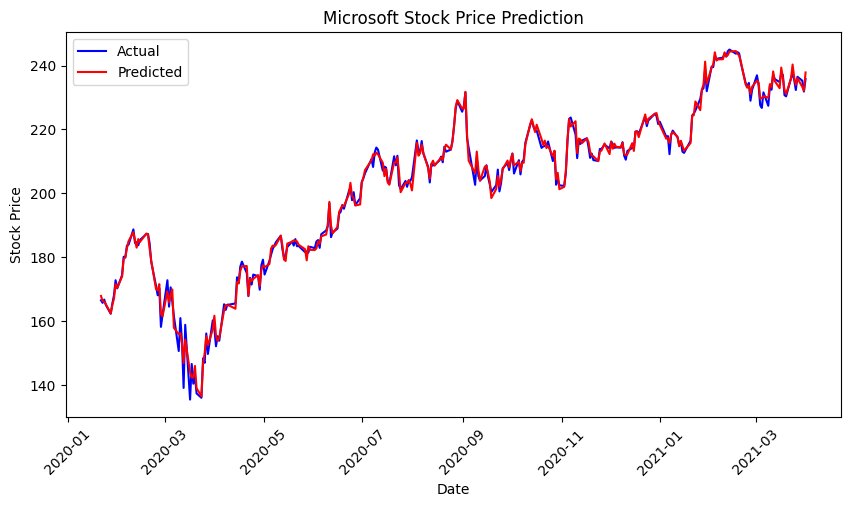

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Microsoft Stock Price Prediction')
plt.xticks(rotation=45)
plt.show()